### **공부 주제**
* **통계 분석**
    * 이유: adsp 자격증 취득 후 이론으로만 공부했던 통계 개념들을 코드에 적용해볼 필요성을 느끼게 됨
* **함수 및 클래스**
    * 아직 사용이 익숙하지 않은 두 method를 연습해 볼 필요성을 느끼게 됨

* **k-menas 클러스터링**

**1) 통계 분석:**

* `t-test, chi-square test`
    * 가설 검증하기(연속형, 범주형 데이터의 구분) 
* 자유도 개념(이해가 부족함)
    * 이해를 더하기 위한 이론 공부와 코드 실습

**1) 통계 분석 - 귀무 가설과 대립 가설**

* 귀무 가설(Null hypothesis): 모집단의 특성에 대해 옳다고 제안하는 잠정적인 주장
    * 예) "모집단의 모수는 OO와 차이가 없다."
    * 예) "광고에 노출된 집단은 광고 접속 횟수에서 노출되지 않은 집단과 차이가 없다"

* 대립 가설(Alternative hypothesis): 귀무가설이 거짓이라면 대안적으로 참이되는 가설
    * 예) "광고에 많이 노출될 수록 해당 웹사이트에 많이 접속한다."

* 주장하고자 하는 대립 가설의 통계적 유의미성을 검증하기 위해 p-value 사용
* 대립 가설을 채택할 수 있는 기준은 p값이 0.05(5%)미만일 때 가능하다. 
    * ###### 어떤 사건이 우연히 발생할 확률이 5%보다 낮을 가능성은 거의 없으며, 만약 발생했다면 그 사건이 통계적으로 유의미했기 때문에 일어났다고 해석

#### **본격적인 가설 검정**
* 가설 검정을 위한 도구로써 T-test, Chi-squared test, F-test등이 있다. 

**1) T-test**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = sns.load_dataset("penguins")
# df = df.dropna()
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


penguins 데이터셋은 아래와 같은 정보를 담고 있다.

* species : 펭귄의 종 (Adelie, Chinstrap, Gentoo)
* island: 살고 있는 섬 이름 (Torgersen, Dream, Biscoe)
* bill_length: 부리의 길이 (단위: mm)
* bill_depth: 부리의 깊이 (단위: mm)
* flipper_length: 플리퍼(≒ 날개)의 길이 (단위: mm)
* body_mass: 체질량 (단위: g)
* sex: 성별 (MALE, FEMALE)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [163]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

**결측치 시각화**

In [164]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<Axes: >

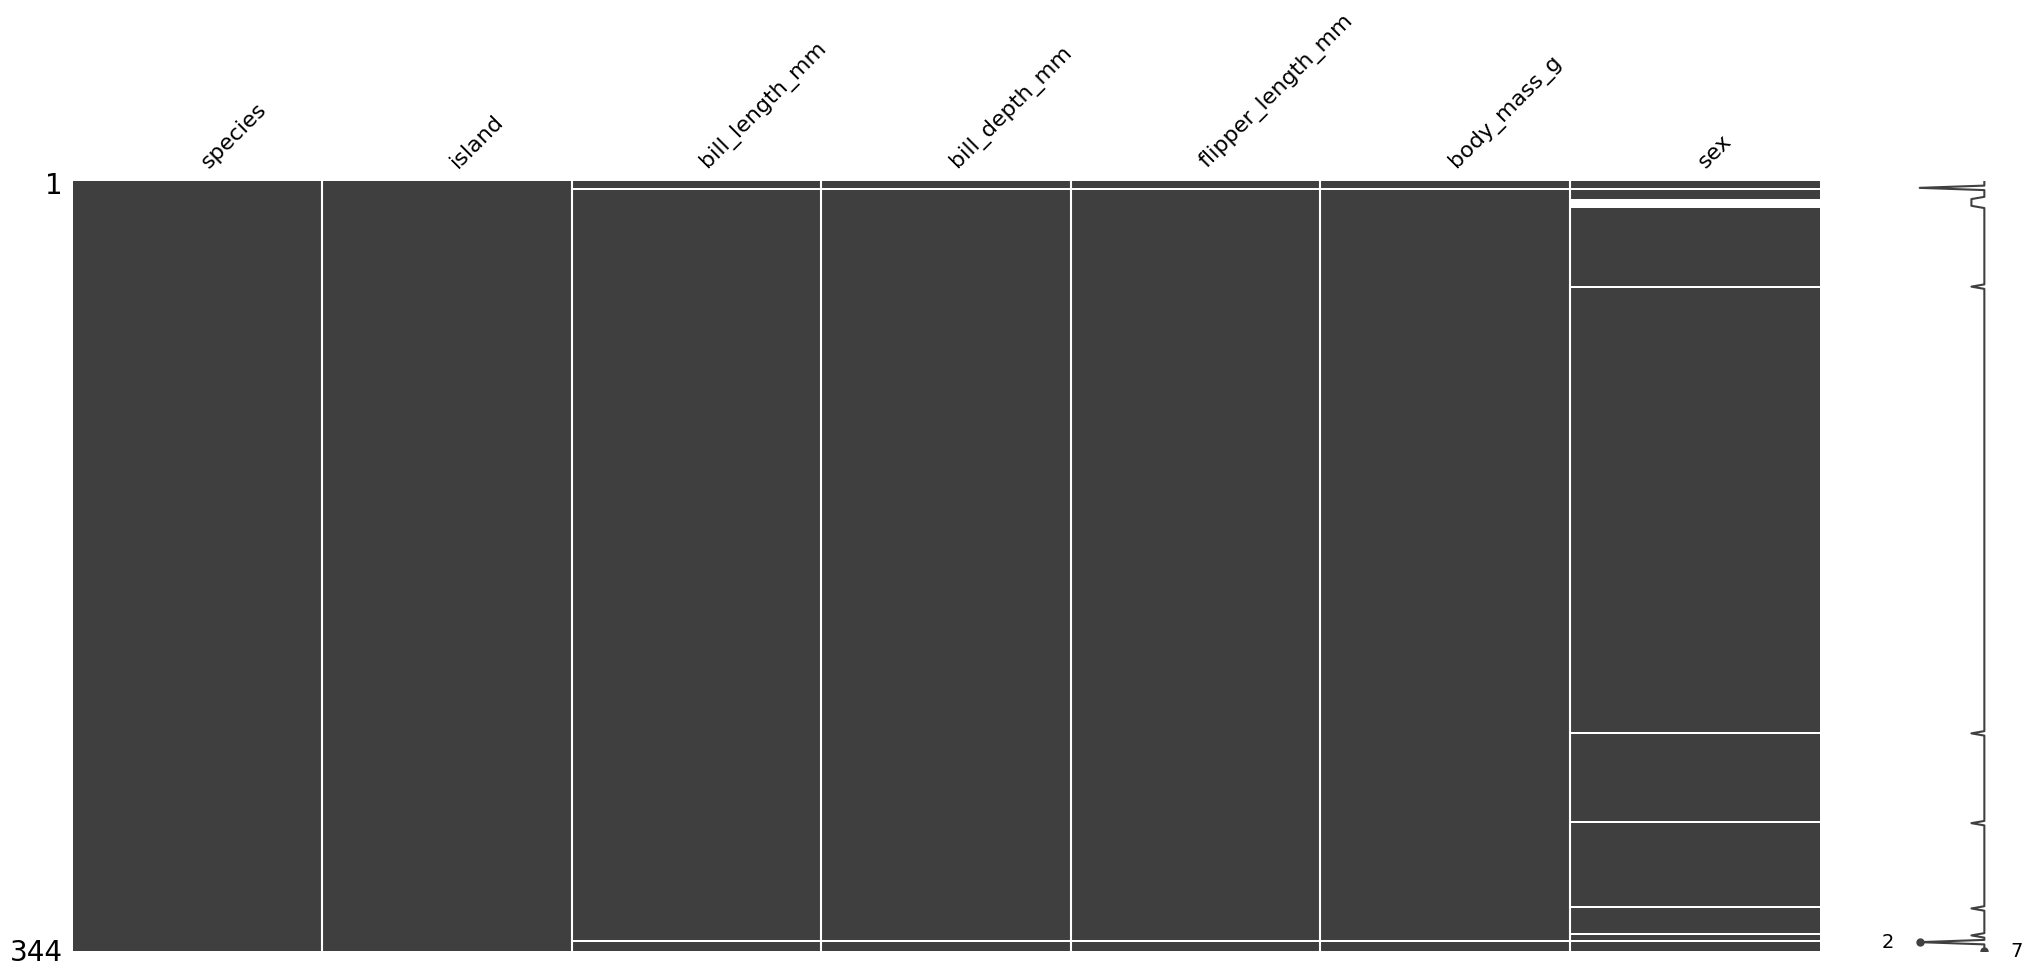

In [165]:
import missingno as mino
mino.matrix(df)

**결측치 채우기**

In [166]:
df['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [167]:
df['sex'].fillna("Male", inplace=True) # male의 수가 더 많으므로 male로 보간

In [168]:
# 수치형 데이터는 평균값으로 보간

df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)

In [169]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**종별 크기, 몸무게 비교**

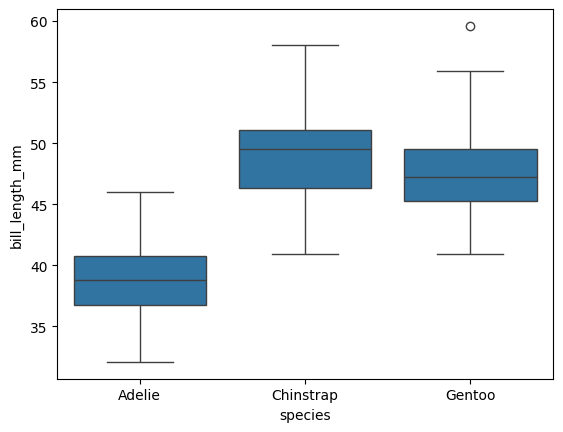

In [10]:
sns.boxplot(data=df, x = "species", y = 'bill_length_mm')
plt.show()

C:\Users\Park se woong\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Park se woong\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Park se woong\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Park se woong\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tigh

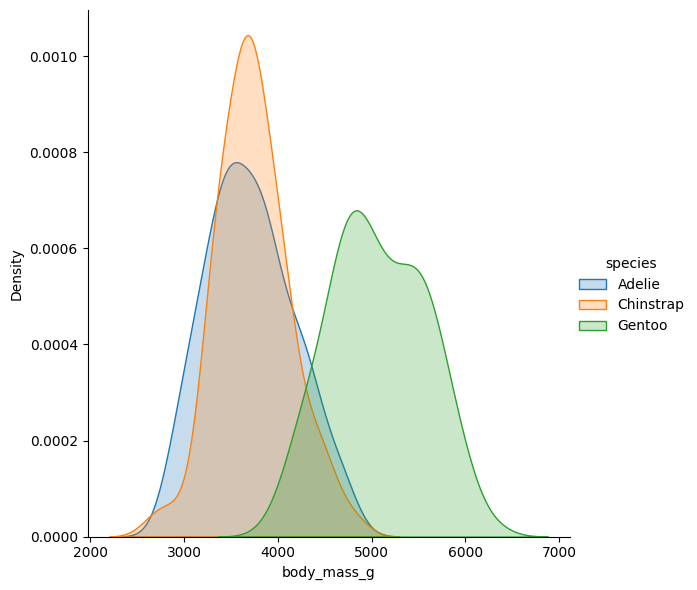

In [11]:
sns.FacetGrid(data = df, hue = "species", height = 6).map(sns.kdeplot, "body_mass_g", shade=True).add_legend()
plt.show()

# 세 종의 몸무게 분포가 정규분포에 가까운 형태를 보임

**가설: Adelie 펭귄은 키가 약 70cm까지 자란다고 한다. 그렇다면 일반적으로 생각할 때 70cm까지 자란 개체의 몸무게는 6kg 이상일 것이다.**

* 평균 수치(4.2kg)이상, 최대 수치(6.3kg)이하의 범위 안에 속할 것 

    * 귀무가설: Adelie 펭귄의 평균 몸무게는 6kg일 것이다.
    * 대립가설: Adelie 펭귄의 평균 몸무게는 6kg이 아닐 것이다.
    * 신뢰도: 95%

In [12]:
df['body_mass_g'].describe()

count     344.000000
mean     4201.754386
std       799.613058
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [13]:
adelie = df[df['species'] == 'Adelie']['body_mass_g']
stats.ttest_1samp(adelie, 6000) # 체중 단위: g

TtestResult(statistic=-61.69242633726757, pvalue=5.395857713530555e-109, df=151)

**two sample T-test**
* 두 표본집단의 평균을 비교할 때 사용한다. 
* 가설: Adeile 펭귄은 Gentoo 펭귄 속의 펭귄 종이라고 한다. 그렇다면 두 종의 펭귄의 생김새가 비슷하지 않을까? 
* 생김새의 측도라고 할 수 있는 평균 부리의 깊이가 같을 것이다. 

In [14]:
adelie = df[df['species'] == 'Adelie']['bill_depth_mm']
gentoo = df[df['species'] == 'Gentoo']['bill_depth_mm']

stats.ttest_ind(adelie, gentoo)

TtestResult(statistic=24.56855765675009, pvalue=3.1803088874056335e-71, df=274.0)

**p-value가 0.05 미만이므로 통계적으로 유의미하다고 볼 수 있다.**

정확한 평균 값을 비교해보면 adelie종은 18.35mm, gentoo종은 15mm로 차이가 있다. 하지만 평균 값의 완전한 일치 여부가 아니라 두 값 사이에 통계적으로 유의미한 차이가 있는 지를 확인하는 절차이기 때문에 두 평균 값은 같다고 봐도 무방하다.  

In [15]:
print("Adelie 종의 평균 부리 깊이:",np.round(adelie.mean(), 2))
print("Gentoo 종의 평균 부리 깊이:",np.round(gentoo.mean(), 2))

Adelie 종의 평균 부리 깊이: 18.34
Gentoo 종의 평균 부리 깊이: 15.0


* 다른 종과도 생김새가 유사할까?
* 귀무가설: 'Adelie' 종과 'Chinstrap' 종의 부리 깊이 유사도는 유사할 것이다.
* 대립가설: 'Adelie' 종과 'Chinstrap' 종의 부리 깊이 유사도는 유사하지 않을 것이다.

In [16]:
adelie = df[df['species'] == 'Adelie']['bill_depth_mm']
Chinstrap = df[df['species'] == 'Chinstrap']['bill_depth_mm']

stats.ttest_ind(adelie, Chinstrap)
# p-value가 0.05 이상이므로 귀무가설을 기각하지 못한다. 

TtestResult(statistic=-0.47200241876327365, pvalue=0.6373971676087207, df=218.0)

In [17]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

**가설: 서식지에 따라 부리의 길이가 다를 것이다.** 
* 먹이와 환경에 따라 식습관이 달라지기 때문이다. 
  * 귀무가설: 서식지에 따라 부리의 길이는 다르지 않다.
  * 대립가설: 서식지에 따라 부리의 길이는 다르다.  


In [18]:
biscoe = df[df['island'] == 'Biscoe']['bill_depth_mm']
dream = df[df['island'] == 'Dream']['bill_depth_mm']
torgensen = df[df['island'] == 'Torgersen']['bill_depth_mm']

f_statistic, p_value = stats.f_oneway(biscoe, dream, torgensen)
print("f_statistic:", f_statistic)
print("p_value:",p_value)

# p-value가 0.05 미만이므로 귀무가설을 기각하고 대립가설을 채택한다. 

f_statistic: 112.5148306502927
p_value: 2.9890952131809953e-38


**하지만 dream과  torgensen섬에 거주하는 펭귄들의 부리 길이의 평균은 큰 차이가 없다.** 
* f-검정에서의 통계적 유의미성은 적어도 하나의 표본이 다른 표본들과 평균 값의 차이을 가진다는 통계적 증거를 제시한다.  

In [19]:
print(df[df['island'] == 'Biscoe']['body_mass_g'].mean())
print(df[df['island'] == 'Dream']['body_mass_g'].mean())
print(df[df['island'] == 'Torgersen']['body_mass_g'].mean())

4712.95687134503
3712.9032258064517
3715.8991228070176


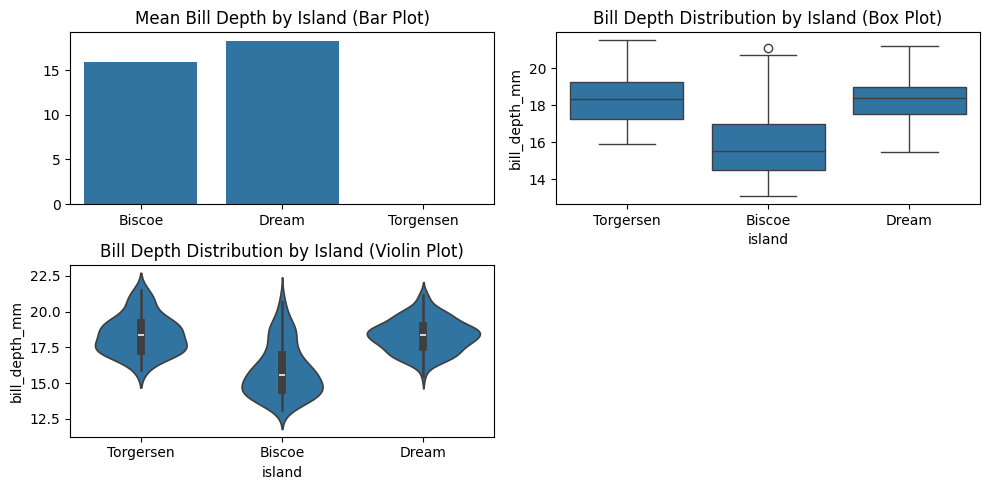

In [20]:
bis_mean = df[df['island'] == 'Biscoe']['bill_depth_mm'].mean()
dre_mean = df[df['island'] == 'Dream']['bill_depth_mm'].mean()
tor_mean = df[df['island'] == 'Torgensen']['bill_depth_mm'].mean()

plt.figure(figsize = (10, 5))
# 막대 그래프
plt.subplot(2, 2, 1)
sns.barplot(x=['Biscoe', 'Dream', 'Torgensen'], y=[bis_mean, dre_mean, tor_mean])
plt.title('Mean Bill Depth by Island (Bar Plot)')

# 상자 그림
plt.subplot(2, 2, 2)
sns.boxplot(x='island', y='bill_depth_mm', data=df)
plt.title('Bill Depth Distribution by Island (Box Plot)')

# 바이올린 플롯
plt.subplot(2, 2, 3)
sns.violinplot(x='island', y='bill_depth_mm', data=df)
plt.title('Bill Depth Distribution by Island (Violin Plot)')

plt.tight_layout()
plt.show()

**Chi-squared test (카이제곱 검정)**
* Chi-squared test는 표본집단의 분포를 비교할 때 선택하는 방법이다. 
* Chi-squared test는 범주형(Categorical data)에 대해서만 사용이 가능하다.

**one sample Chi-squared test**
* 귀무가설: 펭귄의 성비는 1:1일 것이다.
* 대립가설: 펭귄의 성비는 1:1이 아닐 것이다.
* 신뢰도: 95%

In [21]:
male = df['sex'].value_counts()['Male']
female = df['sex'].value_counts()['Female']
exp = len(df) / 2 
'''
f_exp = [exp, exp]는 'Male'과 'Female' 두 범주에 대한 기대값을 
각각 전체 데이터 수의 절반으로 설정한다는 것을 의미.
위 가설에 따라 데이터를 1:1 비율에 해당하도록 나누기 위함.
'''
stats.chisquare(f_obs=[male, female], f_exp = [exp, exp])

Power_divergenceResult(statistic=0.5697674418604651, pvalue=0.45035134358487394)

**two sample Chi-squared test**
귀무가설: 

* 귀무가설: 펭귄의 몸무게와 플리퍼(날개) 길이는 연관이 없다.
* 대립가설: 펭귄의 몸무게와 플리퍼 길이는 연관이 있다.
* 신뢰도: 95%

몸무게와 플리퍼 길이를 각각 세 그룹으로 나누고, 그 결과를 crosstab으로 제작, 펭귄의 몸무게와 플리퍼 길이에 대해서 two sample Chi-squared test를 시행

In [23]:
# 'body_mass_g'와 'flipper_length 열의 값을 동일한 간격의 3개 구간으로 나누고,
#  각 값이 속한 구간을 카테고리형 데이터로 변환하는 작업을 수행

mass_cut = pd.cut(df['body_mass_g'], 3).astype('category')
flipper_cut = pd.cut(df["flipper_length_mm"], 3).astype("category")
    
data = pd.crosstab(mass_cut, flipper_cut)
data.columns = ['Short', 'Middle', 'Long']
data.index = ['Light','Middle','Heavy']

In [24]:
data # 각 셀은 두 범주형 변수의 교차 빈도를 나타냄.

,Short,Middle,Long
Light,98,56,0
Middle,14,76,45
Heavy,0,2,53


In [25]:
chi, pvalue, _, _ = stats.chi2_contingency(data, correction=True)
chi, pvalue
# chi2_contingency(): 두 변수간의 독립성 검정을 수행
    # correction = 기본값은 False, 보정이 들어간 검정 수행 여부를 결정
    # 보정은 표본의 크기가 작을 때 수행하는 것이 적절함. 

# p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 
# 따라서 펭귄의 몸무게와 플리퍼 길이는 연관이 있다

(246.2335662442272, 4.2159065074416765e-52)

**가설2: 종과 몸무게의 차이가 있을 것이다.**
* 종(species)변수는 3개의 category로 나눌 수 있으므로, 범주형 데이터로 간주
* 귀무 가설: 종과 몸무게의 차이가 없을 것이다. 

In [26]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<Axes: ylabel='species'>

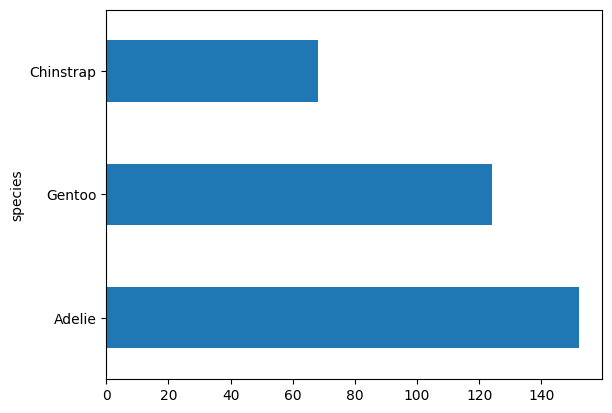

In [27]:
df['species'].value_counts().plot(kind='barh')

In [28]:
from scipy.stats import chi2_contingency

body_mass_cut = pd.cut(df['body_mass_g'], 3).astype('category')
observed_table = pd.crosstab(df['species'], body_mass_cut)
chi2, p, _, _ = chi2_contingency(observed_table)
print(chi2, p)
# p-value가 매우 작은 값으로 측정되므로 귀무가설을 기각한다. 

197.6868227917464 1.1807862020600996e-41


**T-test와 Chi-square test를 class로 구현**

In [29]:
import numpy as np
from scipy.stats import t

class TTest:
    def __init__(self, sample1, sample2):
        # 비교하고자 하는 두 표본을 클래스 속성으로 저장
        self.sample1 = np.array(sample1)
        self.sample2 = np.array(sample2)
        
    def calculate_t_statistic(self): # t-통계량을 계산하는 역할
        mean1, mean2 = np.mean(self.sample1), np.mean(self.sample2) # 각 표본의 평균
        std1, std2 = np.std(self.sample1, ddof=1), np.std(self.sample2, ddof=1) 
        # 각 표본의 비편향 표준편차 게산
         # 표준편차를 사용하면 표본의 크기에 따라 편향된 추정치가 되고 모집단의 표준편차를 과소평가할 수 있음.
         # 비편향 표준편차: 모집단의 표준편차에 대한 추정치(데이터의 변량의 정확한 측정치를 제공)
            # -> 표본 표준편차와 모집단 표준편차간의 차이를 보완
         # ddof 매개변수: 자유도에서 감소할 값 지정(표본 표준편차의 경우 1로 지정)
        
        n1, n2 = len(self.sample1), len(self.sample2) # 각각의 표본 크기
        
        # 풀드(pooled) 표준편차 수식(마크다운 첨부)
         # 두 표본의 정보를 통합하여 모집단의 표준편차를 추정
        pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
        
        # T-통계량 계산
        t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
        
        return t_statistic

    # 두 표본의 평균 차이를 표준 오차로 나누기
    def perform_t_test(self, alpha=0.05, alternative='two-sided'):
        t_statistic = self.calculate_t_statistic() 
        df = len(self.sample1) + len(self.sample2) - 2 # 통계량의 자유도 계산, 자유도는 두 표본의 크기에서 2를 뺀 값.
        p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))
        # t.cdf(): t-분포의 누적 분포 함수 계산
            # 누적 분포 함수: 확률 변수가 특정 값보다 작거나 같을 확률 계산
        # np.abs(t_statistic): t-통계량의 절댓값을 취한 값
            # t-분포는 양쪽 꼬리에 대칭이므로 양쪽 영역을 고려하기 위해 절댓값을 사용
        # 정리: 양측 검정에서 귀무가설의 기각역에 들어갈 확률 계산, 양쪽 꼬리에 대한 확률을 고려하기 위해 절댓값 사용
        return t_statistic, p_value

class SuperTTest(TTest): # TTest 클래스를 상속
    def __init__(self, sample1, sample2, additional_data):
        super().__init__(sample1, sample2) # 부모 클래스의 __init__ 메소드 호출
        self.additional_data = additional_data
    
    def display_additional_data(self):
        print(f"Additional Data: {self.additional_data}")
    # 활용 예시: 통계 결과 해석 
    def interpret_results(self):
            t_stat, p_val = self.perform_t_test()
            self.display_additional_data()
            
            if p_val < 0.05:
                print("The difference is statistically significant.")
            else:
                print("No significant difference observed.")
                
            print(f"T-statistic: {t_stat}")
            print(f"P-value: {p_val}")

# Example usage:
sample1 = adelie
sample2 = gentoo
additional_data = "Stastical significance"

super_t_test_instance = SuperTTest(sample1, sample2, additional_data)
super_t_test_instance.interpret_results()

Additional Data: Stastical significance
The difference is statistically significant.
T-statistic: 24.56855765675009
P-value: 0.0


**pooled 표준편차 수식**

$$pooled variance=\frac{(n1−1)⋅var1+(n2−1)⋅var2}{n1+n2−2}$$

$var1, var2$: 각 표본의 비편향 표분 분산


**t-통계량 계산 수식**

$$tstatistic​=\frac{mean1​−mean2​​}{pooled\_std×n1​1​+n2​1​​}
$$

$pooled\_std$: 등분산 가정 하에서 두 표본의 표준편차의 가중평균

#### **카이제곱 검정 클래스 구현** 

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

class ChiSquareTest: # 카이제곱 검정 수행 클래스 정의
    def __init__(self, observed): # observed: 검정을 수행할 실제 관측 데이터
        self.observed = np.array(observed) # 연산을 위해 array로 변환
    
    def perform_chi_square_test(self, alpha=0.05): #alpha=0.05: 유의수준으로 기본값은 0.05로 설정
        row_totals = np.sum(self.observed, axis=1)  
        col_totals = np.sum(self.observed, axis=0)  
        total = np.sum(self.observed) 

        expected = np.outer(row_totals, col_totals) / total

        # 카이제곱 통계량 계산
            # 관측된 빈도와 기대 빈도간의 차이 제곱
            # 기대 빈도로 나누어 모든 셀에서 얻은 값 합산
        chi2 = np.sum((self.observed - expected)**2 / expected)

        # 자유도 계산
            # 자유도는 교차표의 행과 열의 수에 의해 결정
            # (행의 수 - 1) * (열의 수 - 1)
            # 카이제곱 검정에서 자유도는 검정 통계량의 분포를 결정하고 p-value를 계산하는데 사용
            # 자유도의 독립성은 교차표의 특정한 행과 열에서 일어나는 사건이 다른 행과 열에서 일어나는 사건과 독립적이라는 것을 의미
        dof = (self.observed.shape[0] - 1) * (self.observed.shape[1] - 1)

        # 누적 분포 함수 활용, 카이제곱 통계량에 대한 p-value를 계산.
        p_value = 1 - stats.chi2.cdf(chi2, dof)

        result = {
            'Chi-Square Statistic': chi2,
            'P-value': p_value,
            'Degrees of Freedom': dof,            
        }

        return result

# 위의 카이제곱 함수 사용 예제와 동일
 # 데이터를 3개의 구간으로 나누고 교차 빈도 테이블 생성 -> 입력 데이터로 사용
mass_cut = pd.cut(df['body_mass_g'], 3)
flipper_cut = pd.cut(df["flipper_length_mm"], 3)
    
data = pd.crosstab(mass_cut, flipper_cut)
data.columns = ['Short', 'Middle', 'Long']
data.index = ['Light', 'Middle', 'Heavy']

# 적절한 카이제곱 검정을 위해 전치 행렬 할당
# 데이터 프레임의 행과 열의 구조의 일치성을 위함
observed_data = data.T.values

chi_square_test_instance = ChiSquareTest(observed_data) # 카이제곱 검정을 수행하는 클래스의 인스턴스 생성
result = chi_square_test_instance.perform_chi_square_test() # 수행 결과 반환

print("Chi-Square Test Result:")
for key, value in result.items():
    print(f"{key}: {value}")


Chi-Square Test Result:
Chi-Square Statistic: 246.2335662442272
P-value: 0.0
Degrees of Freedom: 4


### **K-means 클러스터링**
* K-Means 클러스터링은 비지도 학습의 한 형태로, 데이터를 K개의 클러스터로 그룹화하는 알고리즘
* K-means 알고리즘에서 K는 묶을 군집(클러스터)의 개수를 의미하고 means는 평균을 의미한다. 
* 평균(Means)이란 각 클러스터의 중심과 데이터들의 평균 거리를 의미

K-Means 알고리즘 단계:

* 초기 중심 선택: K개의 클러스터 중심(Centroid)을 초기에 무작위로 선택
* 할당 단계: 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당
  * 거리 측정 방법: `유클리드 거리`
* 업데이트 단계: 각 클러스터에 속한 데이터 포인트들을 기반으로 새로운 중심을 계산
  * 새로 할당된 데이터들로 인해 달라진 중심점을 기반으로 계산
* 할당과 업데이트를 반복하면서 클러스터의 중심점 이동이 없을때까지 수행

**유클리드 거리**
* 유클리드 거리는 두 점 사이의 직선 거리를 나타내는 공식으로, K-Means에서는 주로 데이터 포인트 간의 거리를 측정하는 데 사용

* 두 점 $A(x₁, y₁)$와 $B(x₂, y₂)$ 사이의 유클리드 거리는 다음과 같이 정의

$$유클리드 거리=\sqrt{(x_2​−x_1​)^2+(y_2​−y_1​)^2}​$$


CLUSTERING ON BILL LENGTH AND BILL DEPTH


C:\Users\Park se woong\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


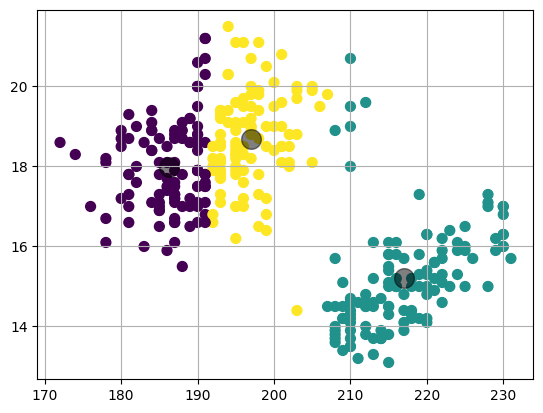

In [131]:
from sklearn.cluster import KMeans

print('CLUSTERING ON BILL LENGTH AND BILL DEPTH')
X = df[['flipper_length_mm','bill_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:,'flipper_length_mm'], X.loc[:, 'bill_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_ #  클러스터 중심 가져오기
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.grid()
plt.show()

CLUSTERING ON FLIPPER LENGTH AND BODY MASS


C:\Users\Park se woong\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


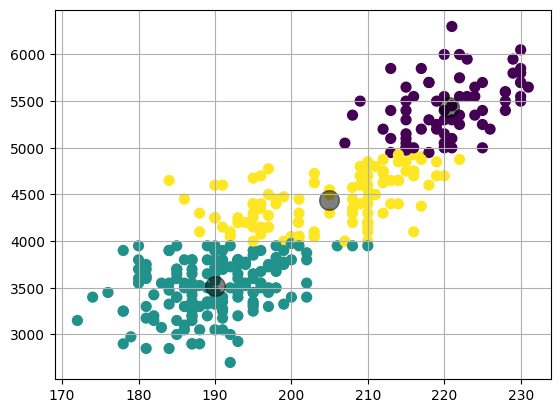

In [173]:
print('CLUSTERING ON FLIPPER LENGTH AND BODY MASS')
X = df[['flipper_length_mm','body_mass_g']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:,'flipper_length_mm'], X.loc[:, 'body_mass_g'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.grid()
plt.show()